# Detection Accuracy
### Privacy Advocates, EECS504 F20
Thomas Cope, Sean Higgins, John Gearig, James Wegienka  <br />
Updated: 12 Dec 20

### Instructions: 
To test a new dataset, you must get the image names and bounding box statistics. To do this, simply change the "group" input to the `get_data()` function to the specific name of the group. For example, to pull images from the folder with pictures from demonstrations set `group = "Demonstration"`

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from validation_functions import *

## Tester function: needs to be modified to either include more forms of classification or be more generic so that it can be a stand-alone function

In [3]:
def tester(data, prototxtPath, weightsPath):
    '''
    Tests the accuracy of the classifier vs. the ground truth.
    Input:
        data: tuple of (filename, bbs(list itself)), which is the output of get_data()
        prototxtPath: path to prototext file (used for DNN architecture)
        weightsPath: path to caffe file (used for DNN architecture)
    Output: 
        total: tuple of (filename, average accuracy per face, count of faces)
    '''
    
    #Defining DNN (baseline classifier)
    net = cv2.dnn.readNet(prototxtPath, weightsPath)
    
    total = []
    
    #For each image
    for i in range(0,len(data)):

        # load the input image from disk, and grab the image spatial dimensions
        image = cv2.imread(data[i][0], cv2.IMREAD_COLOR)
        (h, w) = image.shape[:2]

        # construct a blob from the image
        blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))

        # pass the blob through the network and obtain the face detections
        net.setInput(blob)
        detections = net.forward()
        boxes = data[i][1]
        num_faces = len(boxes)
        count = 0
        result = []
        
        # loop over the detections
        for j in range(0, detections.shape[2]):
            
            # extract the confidence (i.e., probability) associated with the detection
            confidence = detections[0, 0, j, 2]

            # filter out weak detections by ensuring the confidence is greater than the minimum confidence
            if confidence > 0.3:

                count += 1  # keep track of found faces

                # compute the (x, y)-coordinates of the bounding box for the object
                box = detections[0, 0, j, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")

                mink = min_dist(startX, startY, boxes)

                known = (boxes[mink][0], boxes[mink][1], boxes[mink][0] + boxes[mink][2], boxes[mink][1] + boxes[mink][3])
                found = (startX, startY, endX, endY)

                result.append(get_iou(known, found))

        # for each image, get: name, avg, actual number of faces, count
        out = (data[i][0], result, num_faces, count)
        total.append(out)

    return total

## Dataset: Couple

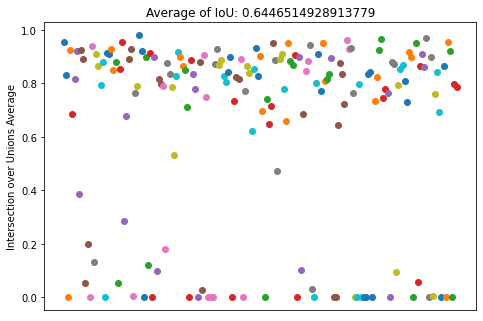

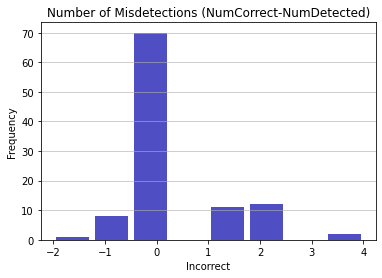

In [4]:
group = "Couple"
path = "/Users/thomcope/Documents/ACADEMICS/20 Fall/EECS504/wider_face_split/wider_face_train_bbx_gt.txt" 
data = get_data(group, path)

prototxtPath = "/Users/thomcope/Documents/ACADEMICS/20 Fall/EECS504/deploy.prototxt"
weightsPath = "/Users/thomcope/Documents/ACADEMICS/20 Fall/EECS504/res10_300x300_ssd_iter_140000.caffemodel"
result = tester(data, prototxtPath, weightsPath)

plot_results(result)

### Inspect sample images

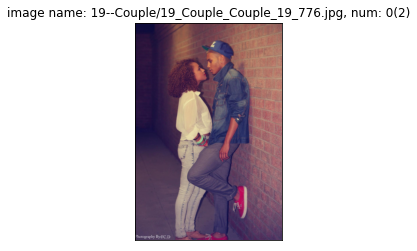

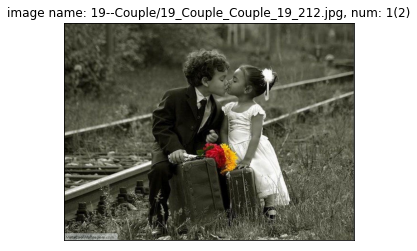

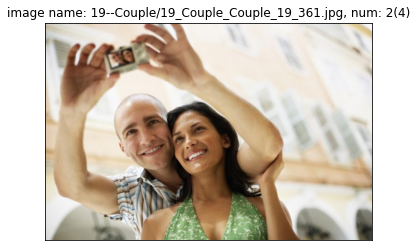

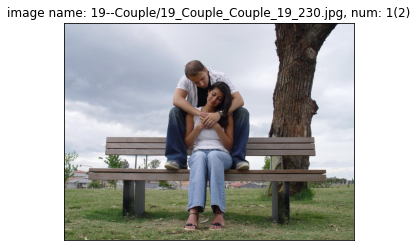

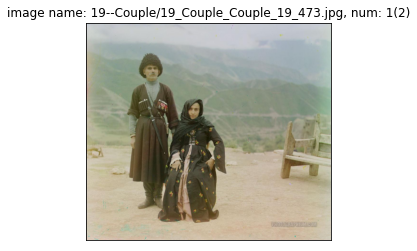

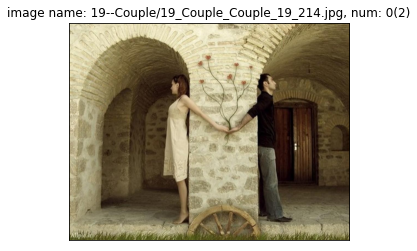

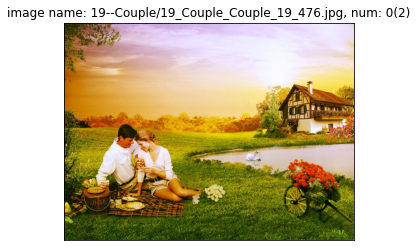

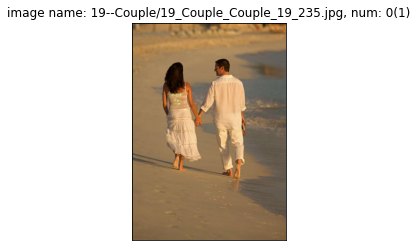

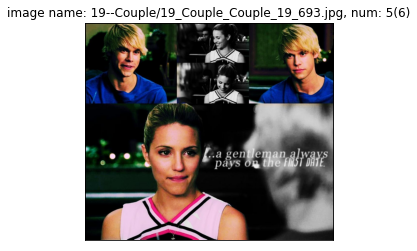

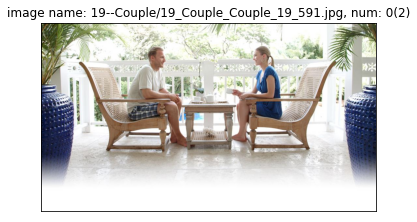

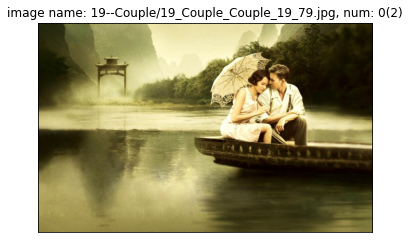

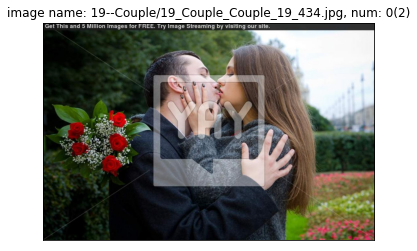

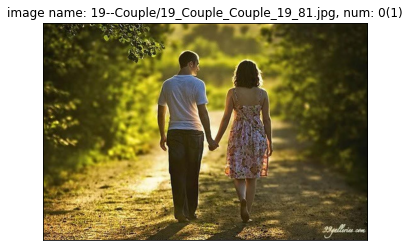

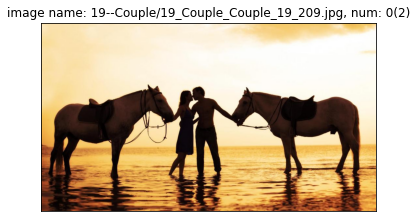

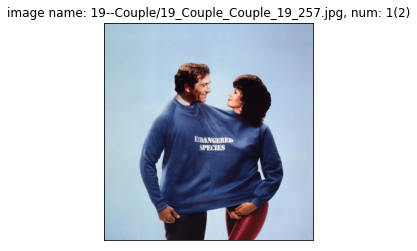

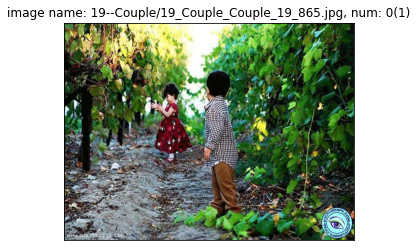

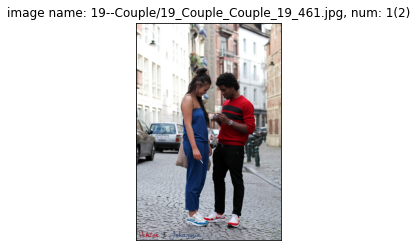

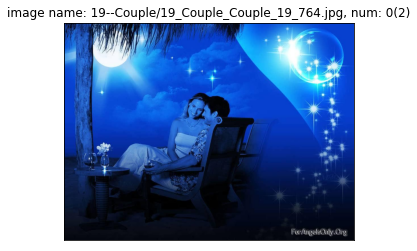

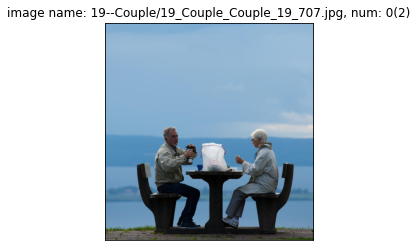

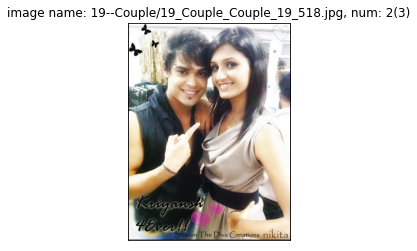

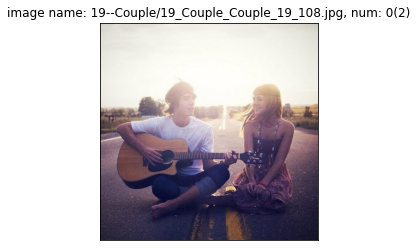

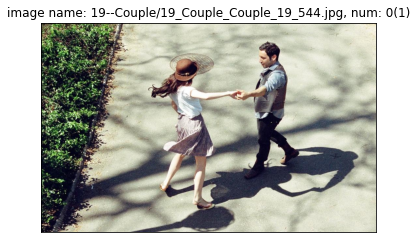

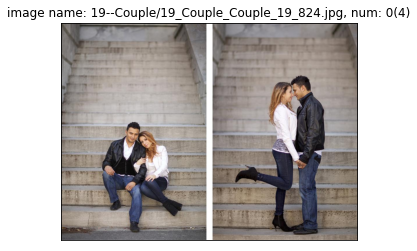

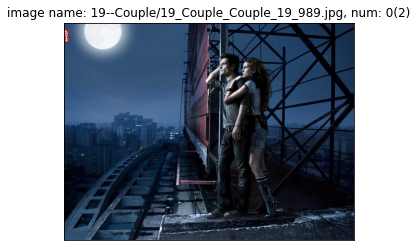

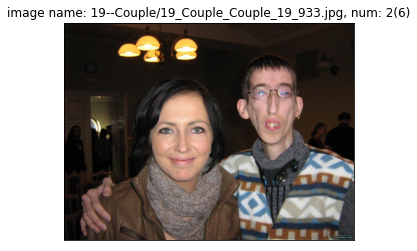

In [5]:
for i in range(0, len(result)):
    if result[i][2] > result[i][3] :
        image = cv2.imread(result[i][0],cv2.IMREAD_COLOR)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.title("image name: {}".format(result[i][0] + ", num: {}".format(result[i][3])) + "({})".format(result[i][2]))
        plt.show()

## Dataset: Demonstration

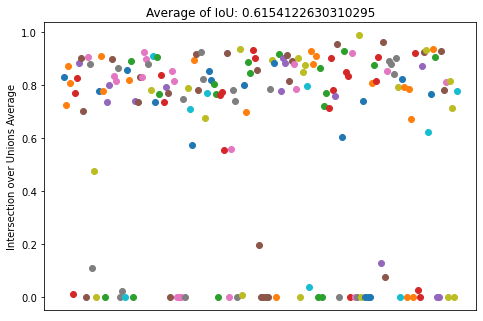

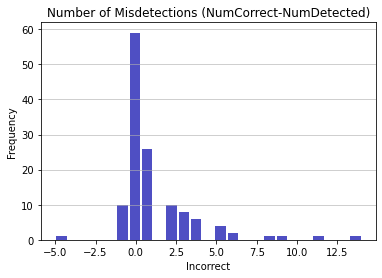

In [6]:
group = "Demonstration"
path = "/Users/thomcope/Documents/ACADEMICS/20 Fall/EECS504/wider_face_split/wider_face_train_bbx_gt.txt" 
data = get_data(group, path)

prototxtPath = "/Users/thomcope/Documents/ACADEMICS/20 Fall/EECS504/deploy.prototxt"
weightsPath = "/Users/thomcope/Documents/ACADEMICS/20 Fall/EECS504/res10_300x300_ssd_iter_140000.caffemodel"
result = tester(data, prototxtPath, weightsPath)

plot_results(result)